## <img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Roberto Compañy

***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./escriba_aqui.png" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante la simulación computacional


In [5]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig

# Insertar aquí el código para inicializar tu notebook
########################################################

import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

import matplotlib.pyplot as plt

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)


import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline, title, grid, figure
from collections import defaultdict
from scipy.signal import tf2zpk


def zplaneplot(b, a, filename=None):
    """Plot the complex z-plane given zeros and poles.
    """
    # Get the poles and zeros
    z, p, k = tf2zpk(b, a)

    if np.empty(p): # In case of FIR systems poles must be forced to 0
        p = np.zeros(len(z))

    # Create zero-pole plot
    figure#(figsize=(16, 9))
    #subplot(2, 2, 1)
    
    # get a figure/plot
    ax = plt.subplot(1, 1, 1)
    # TODO: should just inherit whatever subplot it's called in?

    # Add unit circle and zero axes    
    unit_circle = patches.Circle((0,0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')
    
    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
    
    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=9, 
             color='none', alpha=0.5,
             markeredgecolor=poles[0].get_color(), # same color as poles
             )

    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])
#    ticks = [-1, -.5, .5, 1]
#    plt.xticks(ticks)
#    plt.yticks(ticks)

    """
    If there are multiple poles or zeros at the same point, put a 
    superscript next to them.
    TODO: can this be made to self-update when zoomed?
    """
    # Finding duplicates by same pixel coordinates (hacky for now):
    poles_xy = ax.transData.transform(np.vstack(poles[0].get_data()).T)
    zeros_xy = ax.transData.transform(np.vstack(zeros[0].get_data()).T)    

    # dict keys should be ints for matching, but coords should be floats for 
    # keeping location of text accurate while zooming

    # TODO make less hacky, reduce duplication of code
    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in poles_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, 
                        r' ${}^{' + str(value) + '}$',
                        fontsize=13,
                        )

    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in zeros_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, 
                        r' ${}^{' + str(value) + '}$',
                        fontsize=13,
                        )
            
    grid(True, color='0.9', linestyle='-', which='both', axis='both')
    
    title('Poles and zeros')
    
    # Display zeros, poles and gain
    print(str(len(z)) + " zeros: " + str(z))
    print(str(len(p)) + " poles: " + str(p))
    print("gain: " + str(k))
    

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
        print('Pole-zero plot saved to ' + str(filename))

2 zeros: [-0.5+0.8660254j -0.5-0.8660254j]
2 poles: [0. 0.]
gain: 0.3333333333333333


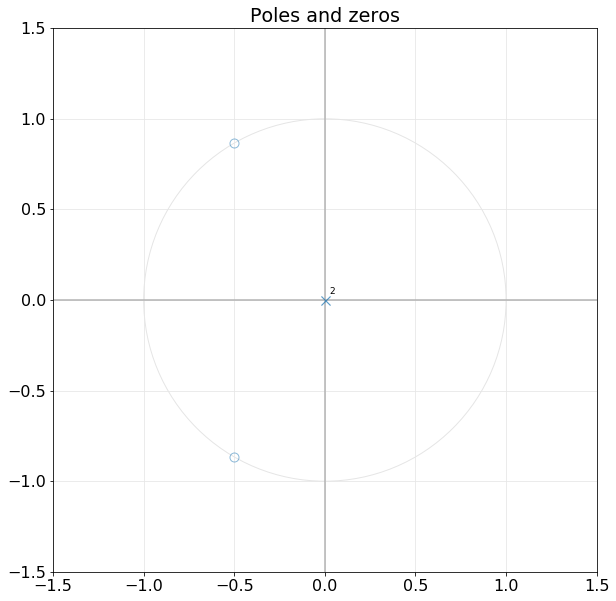

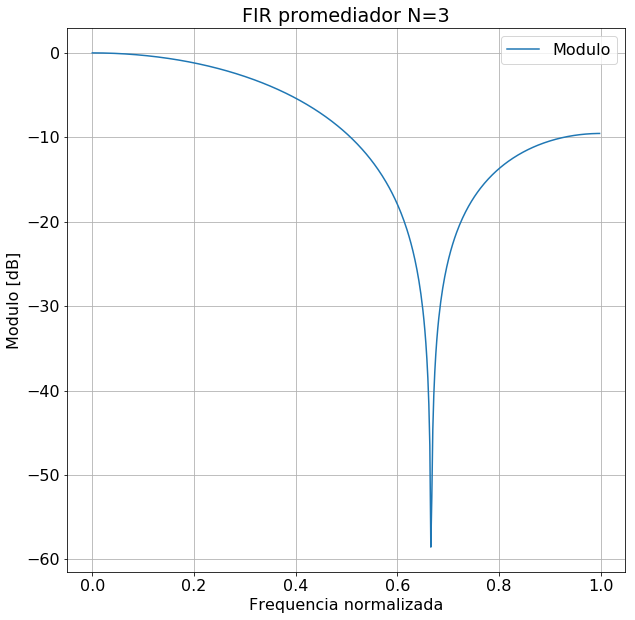

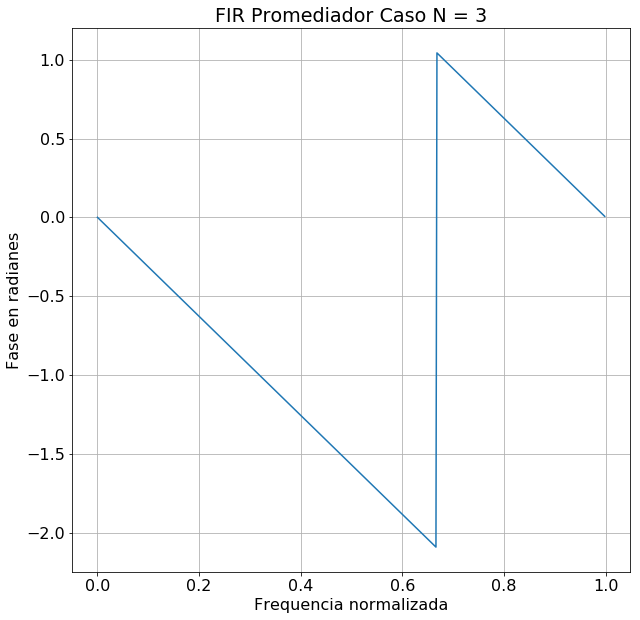

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# N=3

# El diagrama de polos y ceros
#      b              , a)
zplaneplot([1/3, 1/3, 1/3], 1)


# Respuesta en frecuencia
#                            b              , a)
ww, hh = sig.freqz(np.array([1/3, 1/3, 1/3]), 1)
# Normalizo el vector de frecuencias
ww = ww / np.pi


# Respuesta de módulo
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')
plt.title('FIR promediador N=3')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

# Respuesta de fase
plt.figure(2)
plt.plot(ww, np.angle(hh), label='Fase')
plt.title('FIR Promediador Caso N = 3')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')
plt.show()


4 zeros: [ 0.30901699+0.95105652j  0.30901699-0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j]
4 poles: [0. 0. 0. 0.]
gain: 0.2


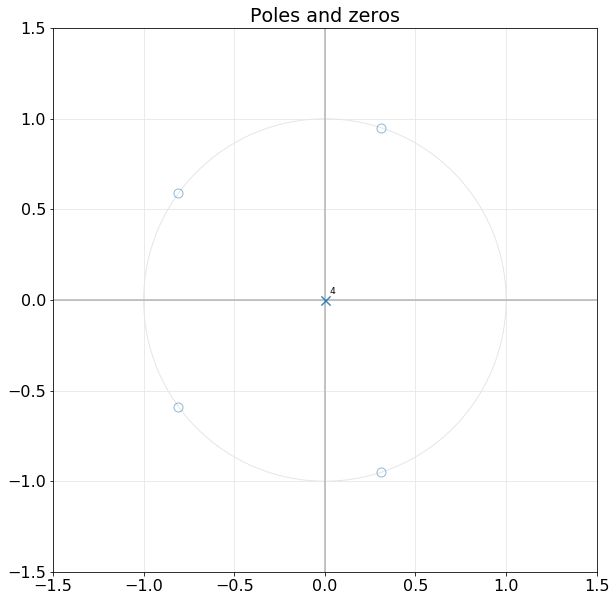

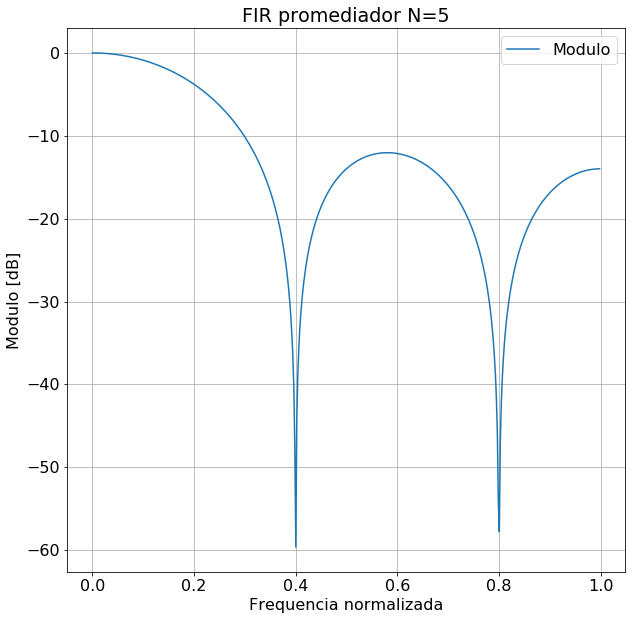

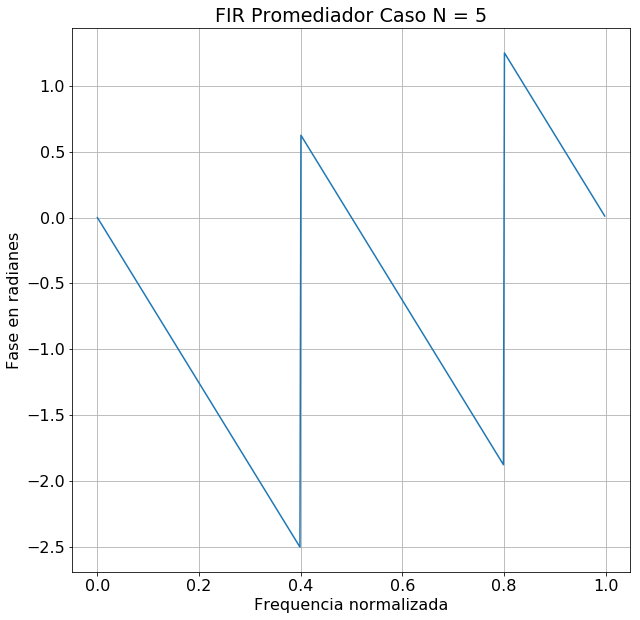

In [7]:
# N=5

# El diagrama de polos y ceros
#           b                       , a)
zplaneplot([1/5, 1/5, 1/5, 1/5, 1/5], 1)


# Respuesta en frecuencia
#                            b                        , a)
ww, hh = sig.freqz(np.array([1/5, 1/5, 1/5, 1/5, 1/5]), 1)
# Normalizo el vector de frecuencias
ww = ww / np.pi


# Respuesta de módulo
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')
plt.title('FIR promediador N=5')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

# Respuesta de fase
plt.figure(2)
plt.plot(ww, np.angle(hh), label='Fase')
plt.title('FIR Promediador Caso N = 5')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')
plt.show()


<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./escriba_aqui.png" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


1 zeros: [1.]
1 poles: [0.]
gain: -1.0


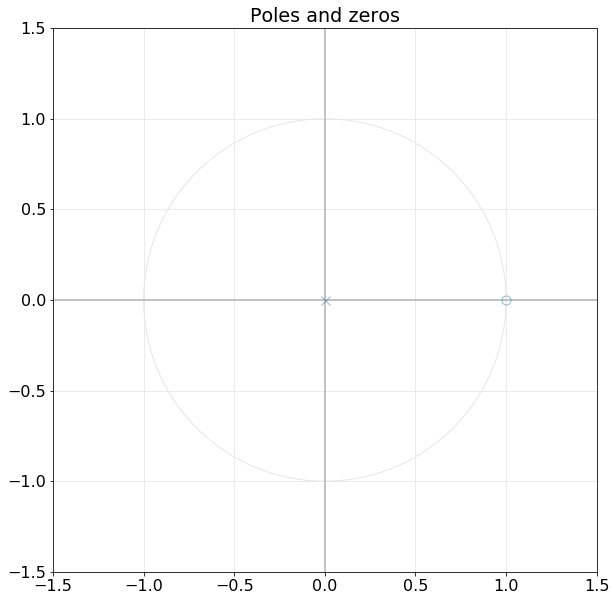

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


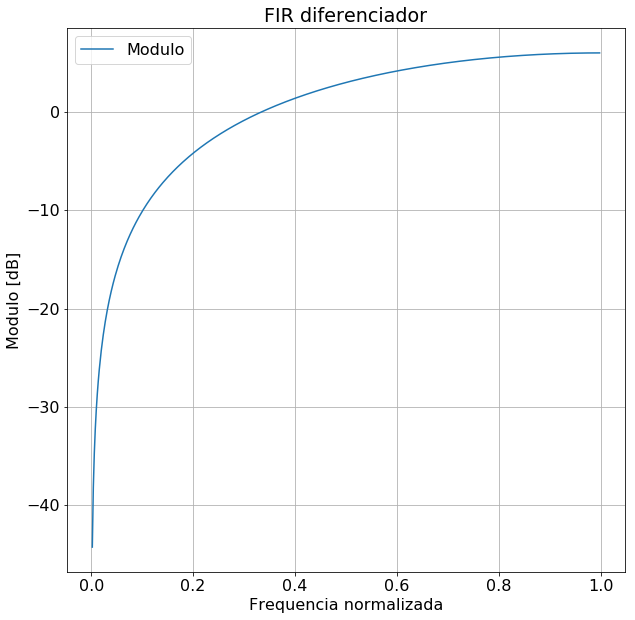

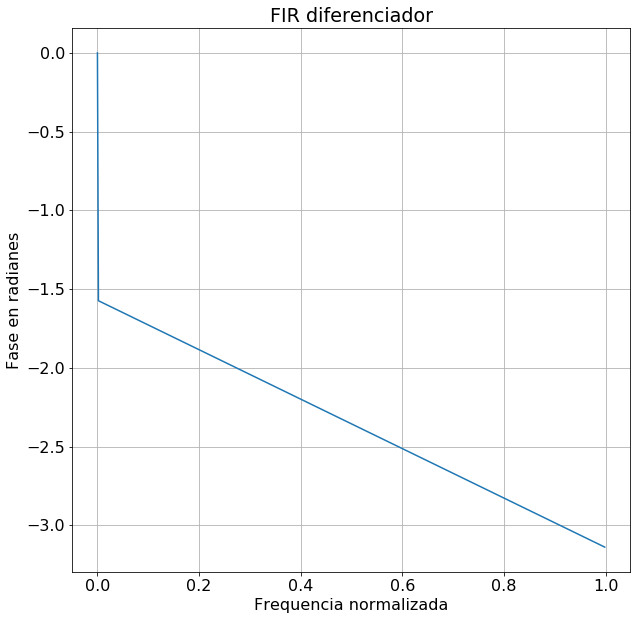

In [11]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# Diferenciador

# El diagrama de polos y ceros
#           b     , a)
zplaneplot([-1, 1], 1)


# Respuesta en frecuencia
#                            b      , a)
ww, hh = sig.freqz(np.array([-1, 1]), 1)
# Normalizo el vector de frecuencias
ww = ww / np.pi


# Respuesta de módulo
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')
plt.title('FIR diferenciador')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

# Respuesta de fase
plt.figure(2)
plt.plot(ww, np.angle(hh), label='Fase')
plt.title('FIR diferenciador')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')
plt.show()




<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./escriba_aqui.png" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


2 zeros: [ 1. -1.]
2 poles: [0. 0.]
gain: 1.0


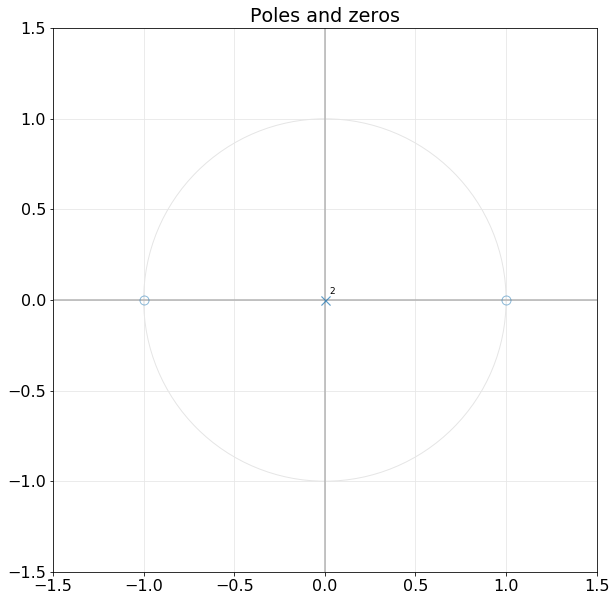

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


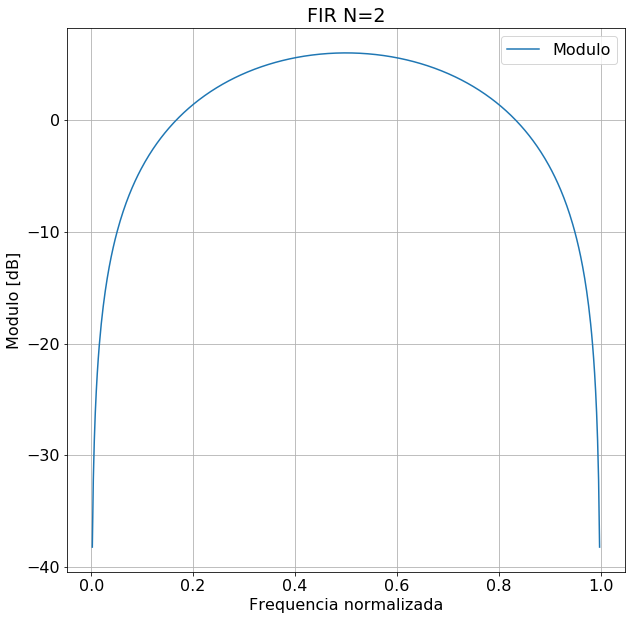

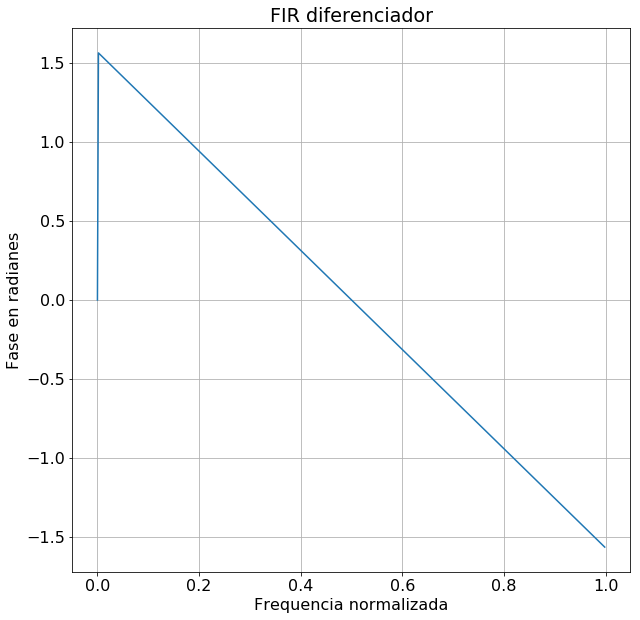

In [12]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Función transferencia
# N = 2 (3 componentes) y b = -1

# El diagrama de polos y ceros
#           b        , a)
zplaneplot([1, 0, -1], 1)


# Respuesta en frecuencia
#                            b         , a)
ww, hh = sig.freqz(np.array([1, 0, -1]), 1)
# Normalizo el vector de frecuencias
ww = ww / np.pi


# Respuesta de módulo
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')
plt.title('FIR N=2')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

# Respuesta de fase
plt.figure(2)
plt.plot(ww, np.angle(hh), label='Fase')
plt.title('FIR diferenciador')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')
plt.show()



4 zeros: [-1.00000000e+00+0.j  8.32667268e-17+1.j  8.32667268e-17-1.j
  1.00000000e+00+0.j]
4 poles: [0. 0. 0. 0.]
gain: 1.0


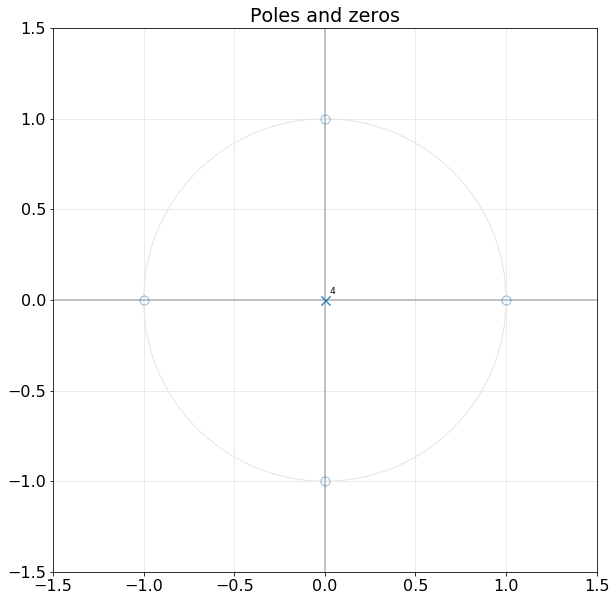

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


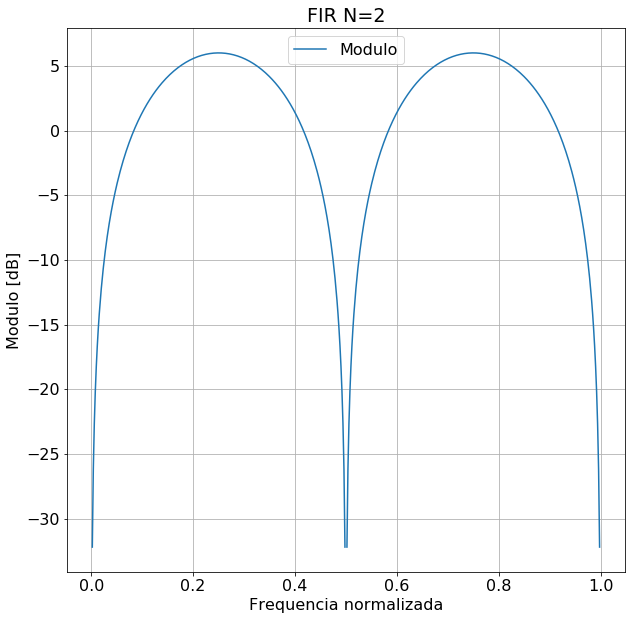

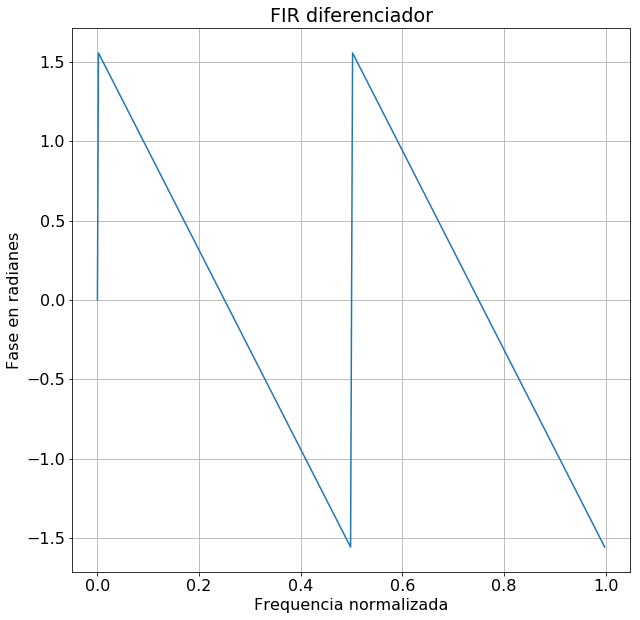

In [13]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# N = 4 (5 componentes) y b = -1

# El diagrama de polos y ceros
#           b              , a)
zplaneplot([1, 0, 0, 0, -1], 1)


# Respuesta en frecuencia
#                            b               , a)
ww, hh = sig.freqz(np.array([1, 0, 0, 0, -1]), 1)
# Normalizo el vector de frecuencias
ww = ww / np.pi


# Respuesta de módulo
plt.figure(1)
plt.plot(ww, 20 * np.log10(abs(hh)), label='Modulo')
plt.title('FIR N=2')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

# Respuesta de fase
plt.figure(2)
plt.plot(ww, np.angle(hh), label='Fase')
plt.title('FIR diferenciador')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase en radianes')
plt.grid(which='both', axis='both')
plt.show()


<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

In [ ]:
# Defina la plantilla del filtro

fs0 = ?? # fin de la banda de detenida 0
fc0 = ?? # comienzo de la banda de paso
fc1 = ?? # fin de la banda de paso
fs1 = ?? # comienzo de la banda de detenida 1


b) ¿Cómo obtuvo dichos valores? 
 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



In [ ]:

# Segmentos de interés #
########################
# Puede tomar como referencia los siguientes segmentos, aunque si lo considera, también
# puede incluir otros que considere importantes para evaluar el rendimiento.

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

In [ ]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg_one_lead[5000:12000])

plt.figure(2)
plt.plot(hb_1)



a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


In [ ]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

